# Decision Tree Classification

### CART - Classification and Regression Tree

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Target Feature - Drug

In [3]:
df["Drug"].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [4]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<Axes: title={'center': 'Drug Distribution'}, xlabel='Drug'>

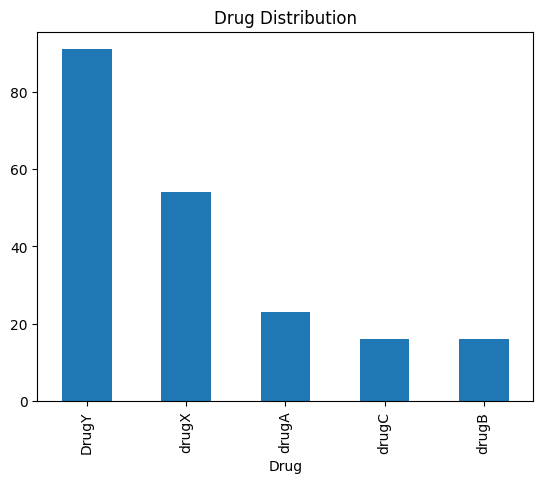

In [6]:
df["Drug"].value_counts().plot(kind="bar", title="Drug Distribution")

### Step 2 - Basic Data Quality Checks

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
m = df.isna().sum()
m

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

### Step  3 - Separate X & Y (Y is Target --> Drug)

In [10]:
X = df.drop(columns=["Drug"])
Y = df[["Drug"]]

In [11]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [12]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


### Step 4 - Preprocessing on X

In [13]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [17]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [18]:
cat

['Sex', 'BP', 'Cholesterol']

In [19]:
con

['Age', 'Na_to_K']

In [14]:
# Since the data contains object, float, and int types, we need to convert the object type to numeric.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [15]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [16]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
)

In [20]:
pre = ColumnTransformer([("num", num_pipe, con), ("cat", cat_pipe, cat)]).set_output(
    transform="pandas"
)

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,0.0,0.0,0.0,0.0
1,0.162699,-0.415145,1.0,1.0,0.0,0.0
2,0.162699,-0.828558,1.0,1.0,0.0,0.0
3,-0.988614,-1.149963,0.0,0.0,1.0,0.0
4,1.011034,0.271794,0.0,1.0,0.0,0.0


In [22]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

### Step 5 - Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.4, random_state=42
)

In [24]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
2,0.162699,-0.828558,1.0,1.0,0.0,0.0
77,-1.109805,0.426945,0.0,0.0,0.0,1.0
46,-0.443255,-0.415423,0.0,0.0,0.0,0.0
187,0.162699,-0.788452,1.0,0.0,0.0,0.0
191,-1.291591,-1.120403,1.0,0.0,0.0,0.0


In [25]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,1.0,1.0,0.0,1.0
15,-1.715759,-0.078892,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,0.0,0.0,1.0,1.0
158,0.889843,-0.782762,0.0,1.0,0.0,0.0
128,0.162699,2.422679,1.0,1.0,0.0,1.0


In [26]:
ytrain.head()

,Drug
2,drugC
77,DrugY
46,drugA
187,drugA
191,drugA


In [27]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [28]:
xtrain.shape

(120, 6)

In [29]:
xtest.shape

(80, 6)

### Step 6 - Model Building

In [30]:
# Since we are doing classification, we will use `DecisionTreeClassifier` from `sklearn.tree`.
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# min_samples_split and min_samples_leaf are hyperparameters that control the minimum number of samples required to split an internal node
# and the minimum number of samples required to be at a leaf node, respectively.
# max_depth controls the maximum depth of the tree, and criterion specifies the function to measure the quality of a split (e.g., "gini" for Gini impurity or "entropy" for information gain).
model = DecisionTreeClassifier(
    max_depth=1, min_samples_split=5, min_samples_leaf=5, criterion="gini"
)

In [32]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [34]:
model.score(xtrain, ytrain)

0.725

In [36]:
model.score(xtest, ytest)

0.725

## Tuning the Hyperparameters in the Model

In [38]:
# Dictionary of hyperparameters to tune
params = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [5, 6, 7, 8],
    "min_samples_leaf": [5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
}

In [39]:
params

{'max_depth': [2, 3, 4, 5],
 'min_samples_split': [5, 6, 7, 8],
 'min_samples_leaf': [5, 6, 7, 8],
 'criterion': ['gini', 'entropy']}

### Hyperparameter Tuning Techniques
1. GridSearchCV ---> For Tuning Single Value, Takes a long time to tune since all possible combinations are checked
2. RandomSearchCV ---> For Tuning Multiple Values, Since Parameters are selected at radom, time taken is less

In [40]:
# If we have a large dataset, we use RandomizedSearchCV to tune the hyperparameters.
from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV is used for hyperparameter tuning, where it randomly samples from the specified parameter grid.
# It is more efficient than GridSearchCV, especially when the parameter space is large.

In [41]:
base_dtc = DecisionTreeClassifier()
rscv = RandomizedSearchCV(
    base_dtc,
    param_distributions=params,
    cv=5,  # Number of cross-validation folds
    scoring="f1_macro",  # Scoring metric to optimize
    n_jobs=-1,  # Use all available CPU cores
)

rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_leaf': [5, 6, 7, 8],
                                        'min_samples_split': [5, 6, 7, 8]},
                   scoring='f1_macro')

In [42]:
rscv.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_depth': 5,
 'criterion': 'entropy'}

### Everyone might receive different parameters

In [47]:
# Cross-validation
rscv.best_score_

np.float64(0.980952380952381)

In [44]:
best_dtc = rscv.best_estimator_
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=6)

### Step 7 - Model Evaluation

In [ ]:
# Training Accuracy
best_dtc.score(xtrain, ytrain)

1.0

In [ ]:
# Testing Accuracy
best_dtc.score(xtest, ytest)

1.0

In [ ]:
# ypred_test is the predicted values for the test set.
# It uses the best estimator found by RandomizedSearchCV to make predictions on the test set
ypred_test = best_dtc.predict(xtest)
ypred_test[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [49]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


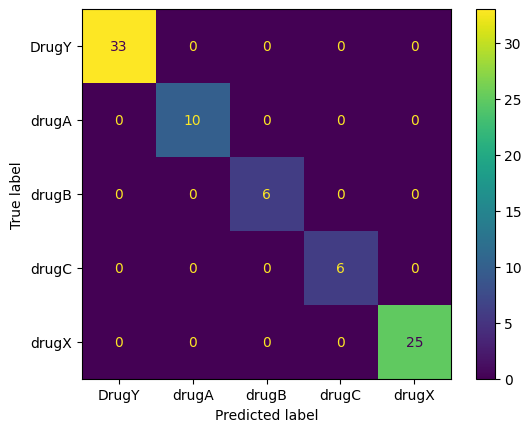

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    best_dtc,
    xtest,
    ytest,
)

### The above is an ideal model

In [51]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        33
       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        25

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    best_dtc,
    xtrain,
    ytrain,
    cv=5,  # Number of cross-validation folds
    scoring="f1_macro",  # Scoring metric to optimize
    n_jobs=-1,  # Use all available CPU cores
)
scores

array([1.       , 1.       , 1.       , 0.9047619, 1.       ])

In [53]:
scores.mean()

np.float64(0.980952380952381)

### Since everything is matching, The above model is very good and can be used for out of sample prediction

### Step 8 - Plot Decision Tree & Check Feature Importances

In [54]:
# plot_tree is used to visualize the decision tree.
# matplotlib.pyplot is used for plotting the decision tree.
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.6666666666666666, 0.9, 'x[1] <= -0.174\nentropy = 1.947\nsamples = 120\nvalue = [58, 13, 10, 10, 29]\nclass = DrugY'),
 Text(0.5555555555555556, 0.7, 'x[3] <= 0.5\nentropy = 1.834\nsamples = 62\nvalue = [0, 13, 10, 10, 29]\nclass = drugX'),
 Text(0.6111111111111112, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'x[4] <= 0.5\nentropy = 1.534\nsamples = 42\nvalue = [0, 13, 10, 0, 19]\nclass = drugX'),
 Text(0.2222222222222222, 0.3, 'x[0] <= 0.375\nentropy = 0.988\nsamples = 23\nvalue = [0.0, 13.0, 10.0, 0.0, 0.0]\nclass = drugA'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]\nclass = drugA'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]\nclass = drugB'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 19\nvalue = [0, 0, 0, 0, 19]\nclass = drugX'),
 Text(0.7777777777777778, 0.5, 'x[5] <= 0.5\nentropy = 1.0\nsamples = 20\nvalue = [0, 0, 0, 10, 10]\nclass = drugC'),
 Text(0.6666666666666666, 

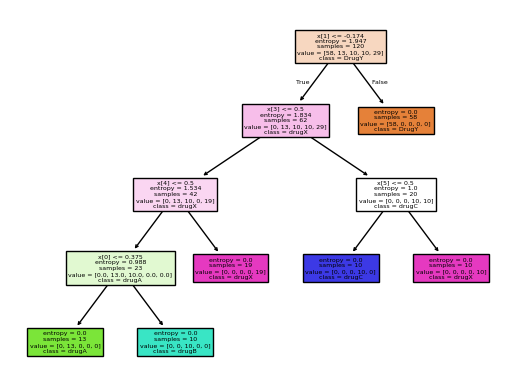

In [55]:
plot_tree(
    best_dtc,
    class_names=best_dtc.classes_,
    filled=True,  # Fill the nodes with colors based on the class
)

[Text(0.6666666666666666, 0.9, 'num__Na_to_K <= -0.174\nentropy = 1.947\nsamples = 120\nvalue = [58, 13, 10, 10, 29]\nclass = DrugY'),
 Text(0.5555555555555556, 0.7, 'cat__BP_LOW <= 0.5\nentropy = 1.834\nsamples = 62\nvalue = [0, 13, 10, 10, 29]\nclass = drugX'),
 Text(0.6111111111111112, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'cat__BP_NORMAL <= 0.5\nentropy = 1.534\nsamples = 42\nvalue = [0, 13, 10, 0, 19]\nclass = drugX'),
 Text(0.2222222222222222, 0.3, 'num__Age <= 0.375\nentropy = 0.988\nsamples = 23\nvalue = [0.0, 13.0, 10.0, 0.0, 0.0]\nclass = drugA'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]\nclass = drugA'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]\nclass = drugB'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 19\nvalue = [0, 0, 0, 0, 19]\nclass = drugX'),
 Text(0.7777777777777778, 0.5, 'cat__Cholesterol_NORMAL <= 0.5\nentropy = 1.0\nsamples = 20\nvalue = [0, 0, 0, 10, 

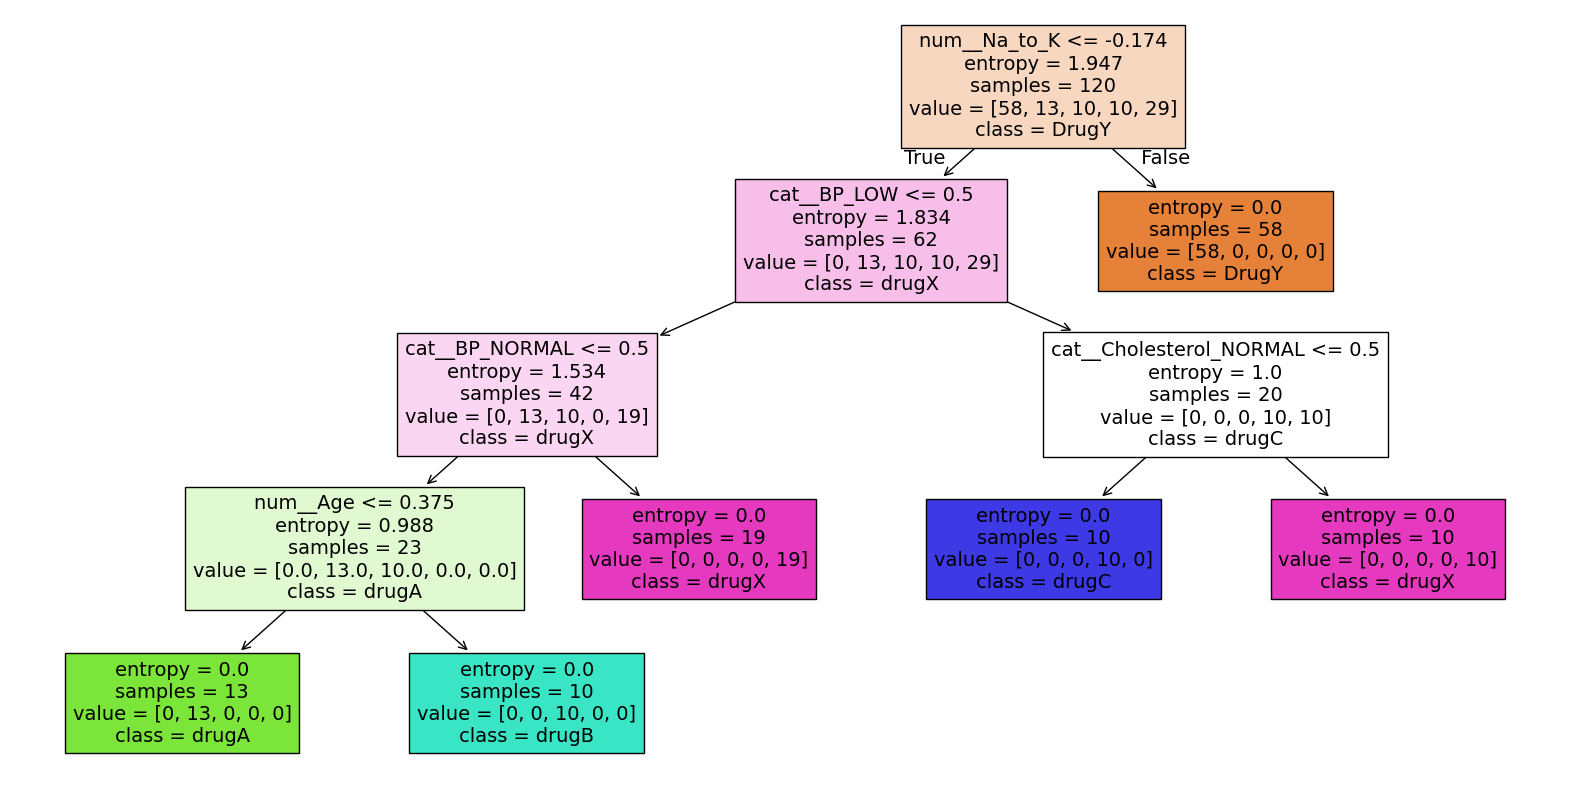

In [57]:
plt.figure(figsize=(20, 10))  # Set the figure size for better visibility
plot_tree(
    best_dtc,
    class_names=best_dtc.classes_,
    filled=True,  # Fill the nodes with colors based on the class
    feature_names=xtrain.columns,  # Use the feature names from the preprocessor
)

In [58]:
ytrain.value_counts()

Drug 
DrugY    58
drugX    29
drugA    13
drugB    10
drugC    10
Name: count, dtype: int64

In [59]:
best_dtc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [60]:
best_dtc.feature_importances_

array([0.0972312 , 0.5132028 , 0.        , 0.12537644, 0.17858713,
       0.08560242])

In [61]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_M', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_NORMAL'],
      dtype='object')

Text(0.5, 0, 'Features')

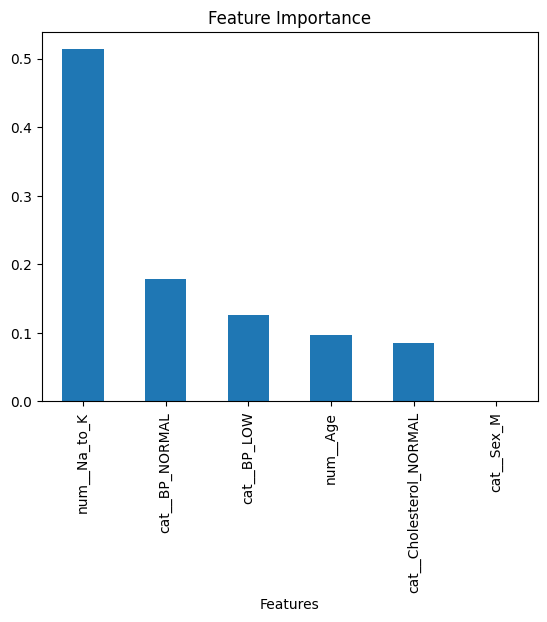

In [64]:
imp = pd.Series(
    best_dtc.feature_importances_,
    index=xtrain.columns,
).sort_values(ascending=False)
imp.plot(kind="bar", title="Feature Importance")
plt.xlabel("Features")

### From above, it was visible that Na to K ratio is max while Sex is min

### Step 9 - Out of Sample Prediction

In [67]:
xnew = pd.read_csv("drugtest.csv")
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,37.0,F,HIGH,HIGH,13.091
1,NaN,F,HIGH,HIGH,12.894
2,23.0,M,NaN,HIGH,31.686
3,31.0,M,HIGH,HIGH,30.366
4,39.0,M,HIGH,HIGH,9.664


In [68]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [69]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-0.443255,-0.415423,0.0,0.0,0.0,0.0
1,0.041508,-0.442762,0.0,0.0,0.0,0.0
2,-1.291591,2.165111,1.0,0.0,0.0,0.0
3,-0.806828,1.981927,1.0,0.0,0.0,0.0
4,-0.322065,-0.891007,1.0,0.0,0.0,0.0


In [70]:
preds = best_dtc.predict(xnew_pre)
preds[0:5]

array(['drugA', 'drugA', 'DrugY', 'DrugY', 'drugA'], dtype=object)

In [71]:
probs = best_dtc.predict_proba(xnew_pre)
probs[0:5]

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [72]:
xnew["Drug_pred"] = preds
xnew[best_dtc.classes_] = probs

In [73]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred,DrugY,drugA,drugB,drugC,drugX
0,37.0,F,HIGH,HIGH,13.091,drugA,0.0,1.0,0.0,0.0,0.0
1,NaN,F,HIGH,HIGH,12.894,drugA,0.0,1.0,0.0,0.0,0.0
2,23.0,M,NaN,HIGH,31.686,DrugY,1.0,0.0,0.0,0.0,0.0
3,31.0,M,HIGH,HIGH,30.366,DrugY,1.0,0.0,0.0,0.0,0.0
4,39.0,M,HIGH,HIGH,9.664,drugA,0.0,1.0,0.0,0.0,0.0
5,16.0,M,LOW,HIGH,12.006,drugC,0.0,0.0,0.0,1.0,0.0
6,33.0,F,LOW,HIGH,NaN,drugC,0.0,0.0,0.0,1.0,0.0
7,59.0,M,HIGH,HIGH,NaN,drugB,0.0,0.0,1.0,0.0,0.0
8,68.0,M,LOW,HIGH,10.291,drugC,0.0,0.0,0.0,1.0,0.0
9,30.0,F,NORMAL,HIGH,10.443,drugX,0.0,0.0,0.0,0.0,1.0


In [74]:
xnew["Drug_pred"].value_counts()

Drug_pred
DrugY    24
drugX    11
drugA     7
drugC     7
drugB     1
Name: count, dtype: int64

In [75]:
xnew.to_csv("Results.csv", index=False)

### Step 10 - Save and Load

### Save

In [76]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [77]:
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=6)

In [78]:
import joblib

joblib.dump(pre, "pre.joblib")
joblib.dump(best_dtc, "drugs_model.joblib")

['drugs_model.joblib']

### Load

In [79]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [80]:
m = joblib.load("drugs_model.joblib")
m

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=6)

In [81]:
m.score(xtrain, ytrain)

1.0

In [82]:
m.score(xtest, ytest)

1.0